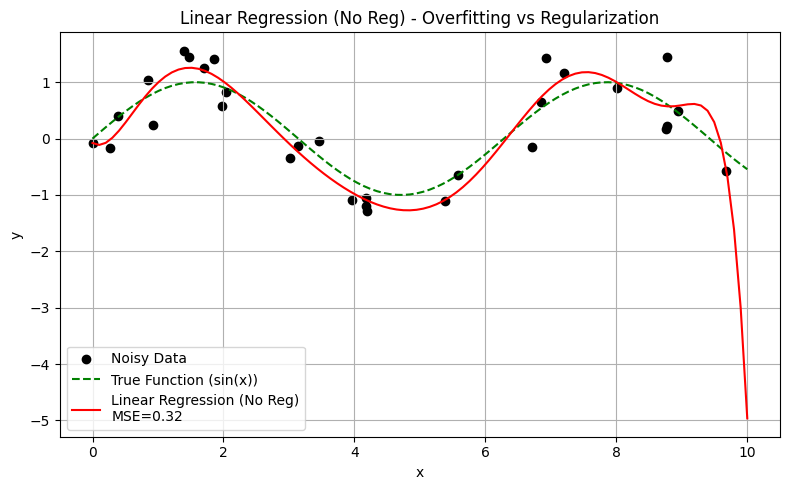

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.23655e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


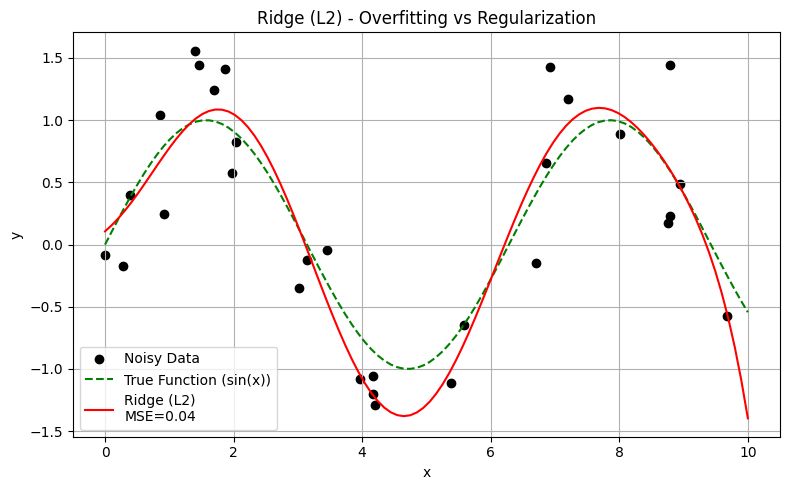

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.210e+00, tolerance: 2.320e-03
  model = cd_fast.enet_coordinate_descent(


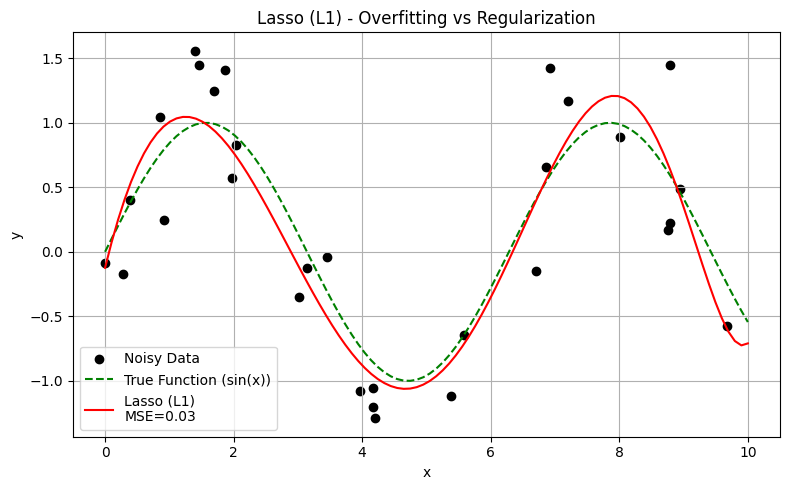

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.134e+00, tolerance: 2.320e-03
  model = cd_fast.enet_coordinate_descent(


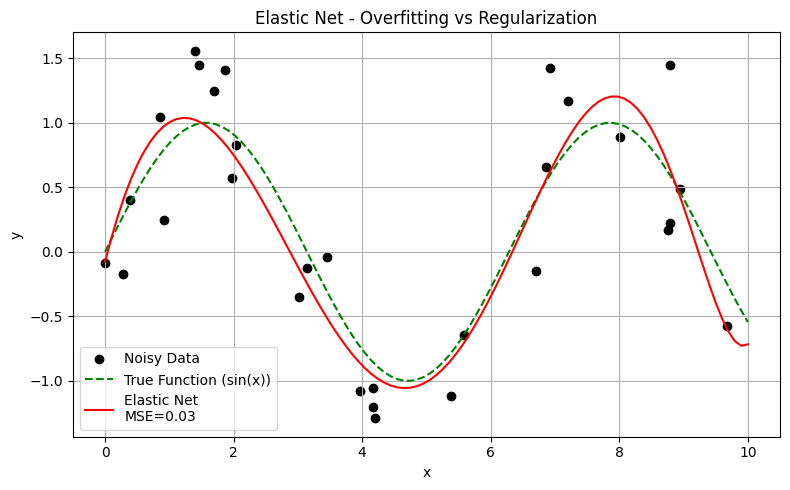

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# -------------------------------
# Generate simple nonlinear data
# -------------------------------
np.random.seed(1)
n_samples = 30
X = np.sort(np.random.rand(n_samples) * 10).reshape(-1, 1)  # Feature: x in [0, 10]
y_true = np.sin(X).ravel()                                  # True function: sin(x)
y = y_true + np.random.randn(n_samples) * 0.5               # Add noise

# Polynomial features (degree=10) → overfitting-prone
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

# -------------------------------
# Define models
# -------------------------------
models = {
    'Linear Regression (No Reg)': LinearRegression(),
    'Ridge (L2)': Ridge(alpha=1.0),
    'Lasso (L1)': Lasso(alpha=0.01, max_iter=10000),
    'Elastic Net': ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
}

# Create test data for smooth curve plotting
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
true_y_test = np.sin(X_test).ravel()

# -------------------------------
# Plotting each model separately
# -------------------------------
for i, (name, model) in enumerate(models.items()):
    model.fit(X_poly, y)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(true_y_test, y_pred)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='black', label='Noisy Data')
    plt.plot(X_test, true_y_test, color='green', linestyle='--', label='True Function (sin(x))')
    plt.plot(X_test, y_pred, color='red', label=f'{name}\nMSE={mse:.2f}')
    plt.title(f"{name} - Overfitting vs Regularization")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
